In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load datasættet
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

# se de første rækker og datatyper
print(data.head())
print(data.info())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [12]:
# clean data we dont need
data_cleaned = data.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'])

# make to numeric value
data_encoded = pd.get_dummies(data_cleaned, drop_first=True)


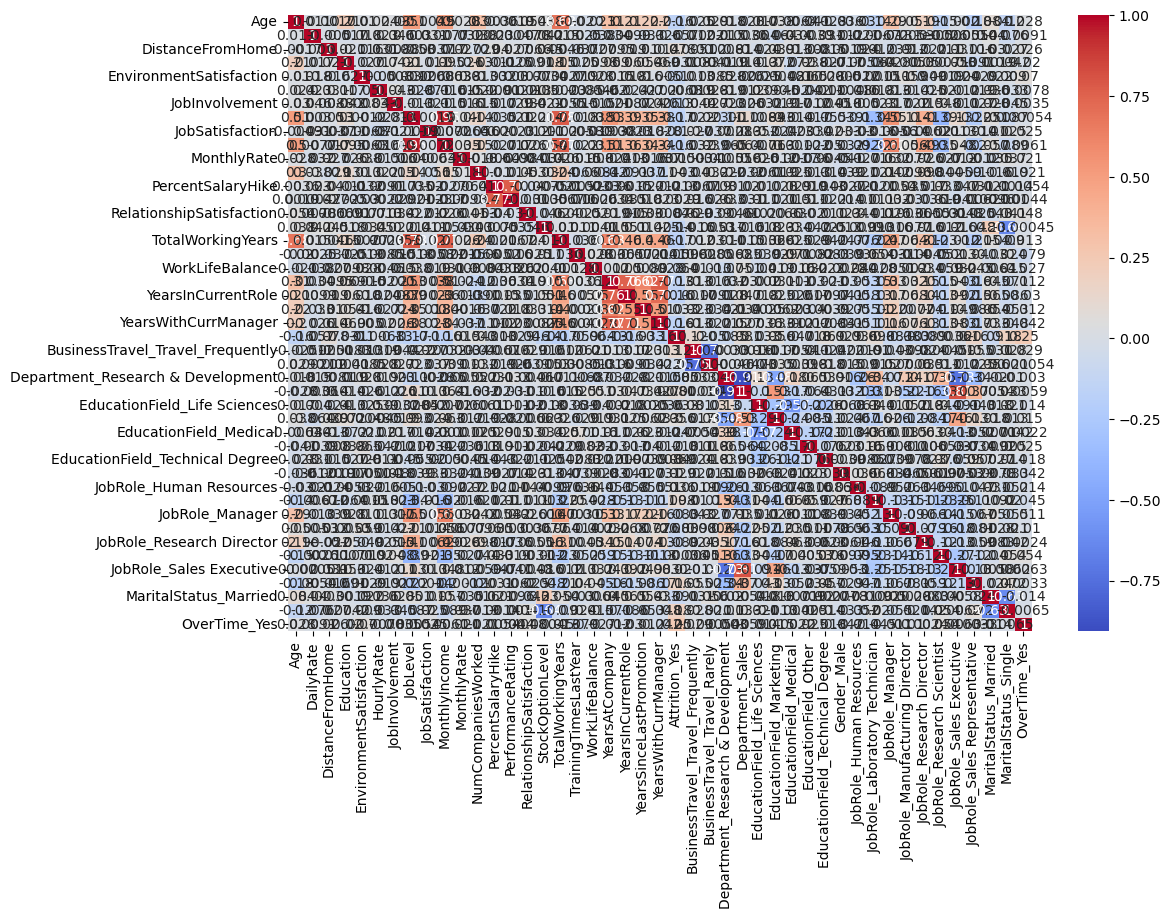

In [14]:
# Korrelationsmatrix 
plt.figure(figsize=(12,8))
sns.heatmap(data_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
from sklearn.model_selection import train_test_split

# Definer features og target
X = data_encoded.drop('Attrition_Yes', axis=1)  # 'Attrition_Yes' er target
y = data_encoded['Attrition_Yes']

# Opdel data i trænings- og test-sæt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialiser Gaussian Naive Bayes model
model = GaussianNB()

# Træn Gaussian Naive Bayes model
model.fit(X_train, y_train)

# Forudsig test-sættet
y_pred = model.predict(X_test)

# Evaluer modellen
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7925170068027211
Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.82      0.87       255
        True       0.34      0.62      0.44        39

    accuracy                           0.79       294
   macro avg       0.64      0.72      0.66       294
weighted avg       0.85      0.79      0.82       294

Confusion Matrix:
 [[209  46]
 [ 15  24]]


In [24]:
from sklearn.model_selection import cross_val_score

# Krydsvalidering med Decision Tree
scores = cross_val_score(clf, X, y, cv=5)
print("avg cross-validation accuracy:", scores.mean())


avg cross-validation accuracy: 0.7857142857142858


In [26]:
from sklearn.cluster import KMeans

# Drop target og vælg features for clustering
clustering_features = data_encoded.drop('Attrition_Yes', axis=1)

# Anvend KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(clustering_features)

# Tildel klynger
clusters = kmeans.labels_


In [28]:
from sklearn.metrics import silhouette_score

# Beregn silhuet-score
sil_score = silhouette_score(clustering_features, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.49301775534497094


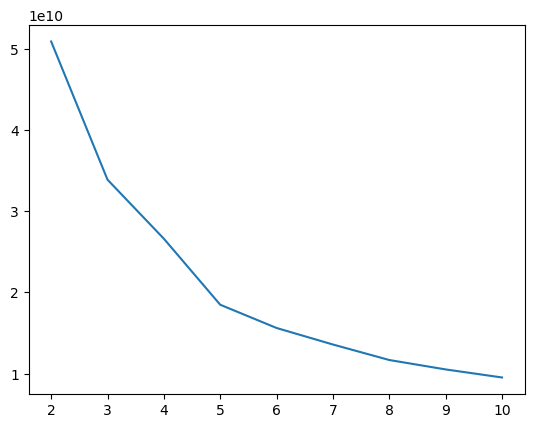

In [32]:
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(clustering_features)
    wcss.append(kmeans.inertia_)

# Plot Elbow-metoden
plt.plot(range(2, 11), wcss)
plt.show()
